In [1]:
import datetime

import numpy as np
import pandas as pd
import pandas_datareader as pdr  # IF NECESSARY, from terminal: pip install pandas_datareader
from numpy.random import default_rng

pd.set_option("display.max_rows", 10)  # display option for pandas
# more here: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

## A quick hit of Numpy

In [2]:
# create a random vector 
# every run of this --> diff #s
# see 3.2.2.2 in the textbook for why, 
# and how to prevent

rg = default_rng()
myray = rg.standard_normal(5)
print("myray:", myray) 

myray: [-2.49734583  0.2014806   0.5353779   0.07146438  0.14526058]


In [3]:
# q1 - indexing, pick the odd elements
myray[::2] # grabs every other, starting at 0
myray[1::2] # grabs every other, starting at 1

array([0.2014806 , 0.07146438])

Booleans arrays: Asking a logic test on an array, returns the array, where each element has been tested against that logic and converted to the boolean answer.

In [4]:
# q2 - (a) boolean array + (b) "masking"

# (a)
myray > 0

# (b)
mask = myray > 0 # store that boolean as a "mask"
myray[mask] # show the values for which the mask/filter is true

array([0.2014806 , 0.5353779 , 0.07146438, 0.14526058])

What you just learned about masking and filtering can be done with dataframes!

## The main event - Pandas

Vocab
- series
- index 
- dataframe
- columns and names
- rows and index 
- multiindex 

In [5]:
start = datetime.datetime(2017, 1, 1) # you can specify start and end dates this way
end = datetime.datetime(2021, 1, 27)
macro_df = pdr.data.DataReader(['GDP','CPIAUCSL','UNRATE'], 'fred', start, end)


In [6]:
# preview the dataframe
macro_df

,GDP,CPIAUCSL,UNRATE
DATE,,,
2017-01-01,19280.084,243.618,4.7
2017-02-01,NaN,244.006,4.6
2017-03-01,NaN,243.892,4.4
2017-04-01,19438.643,244.193,4.4
2017-05-01,NaN,244.004,4.4
...,...,...,...
2020-09-01,NaN,260.029,7.8
2020-10-01,22024.502,260.286,6.8
2020-11-01,NaN,260.813,6.7


In [7]:
# shape
macro_df.shape

(49, 3)

In [8]:
# variable types
macro_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2017-01-01 to 2021-01-01
Freq: MS
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GDP       17 non-null     float64
 1   CPIAUCSL  49 non-null     float64
 2   UNRATE    49 non-null     float64
dtypes: float64(3)
memory usage: 1.5 KB


In [9]:
# look at top X rows
macro_df.head(10) # bby default its 5

macro_df[:5]      # treat like a list (which rows are up to you)
macro_df[20:30:2] # list slicing works here too!

macro_df.iloc[10:20, -1:]  # [rows, cols] which rows and columns to look at?

,UNRATE
DATE,
2017-11-01,4.2
2017-12-01,4.1
2018-01-01,4.0
2018-02-01,4.1
2018-03-01,4.0
2018-04-01,4.0
2018-05-01,3.8
2018-06-01,4.0
2018-07-01,3.8


In [10]:
# look at bottom X rows
macro_df.tail(8) # by default, 5

,GDP,CPIAUCSL,UNRATE
DATE,,,
2020-06-01,NaN,256.986,11.0
2020-07-01,21647.640,258.278,10.2
2020-08-01,NaN,259.411,8.4
2020-09-01,NaN,260.029,7.8
2020-10-01,22024.502,260.286,6.8
2020-11-01,NaN,260.813,6.7
2020-12-01,NaN,262.035,6.7
2021-01-01,22600.185,262.650,6.4


In [11]:
# grab one variable
macro_df['GDP']  # bracket, then name as string

DATE
2017-01-01    19280.084
2017-02-01          NaN
2017-03-01          NaN
2017-04-01    19438.643
2017-05-01          NaN
                ...    
2020-09-01          NaN
2020-10-01    22024.502
2020-11-01          NaN
2020-12-01          NaN
2021-01-01    22600.185
Freq: MS, Name: GDP, Length: 49, dtype: float64

In [12]:
# grab two (or more) variables
macro_df[ ['GDP','UNRATE']   ]   # put a list of variable names inside!

,GDP,UNRATE
DATE,,
2017-01-01,19280.084,4.7
2017-02-01,NaN,4.6
2017-03-01,NaN,4.4
2017-04-01,19438.643,4.4
2017-05-01,NaN,4.4
...,...,...
2020-09-01,NaN,7.8
2020-10-01,22024.502,6.8
2020-11-01,NaN,6.7


In [13]:
# see column names
macro_df.columns   # column names is an attribute 

Index(['GDP', 'CPIAUCSL', 'UNRATE'], dtype='object')

In [14]:
# change column names

#macro_df.rename(columns={...})             # rename one or many variables 
#macro_df.columns = ['var1','var2','var3']  # .column = [list of names], rename all vars

In [15]:
# see index
macro_df.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01'],
              dtype='datetime64[ns]', name='DATE', freq='MS')

In [16]:
# reset_index() and set_index()
macro_df.reset_index() # turns index into a variable

new_df = macro_df.reset_index()
new_df.set_index('DATE') # turns variable(s) into index 

,GDP,CPIAUCSL,UNRATE
DATE,,,
2017-01-01,19280.084,243.618,4.7
2017-02-01,NaN,244.006,4.6
2017-03-01,NaN,243.892,4.4
2017-04-01,19438.643,244.193,4.4
2017-05-01,NaN,244.004,4.4
...,...,...,...
2020-09-01,NaN,260.029,7.8
2020-10-01,22024.502,260.286,6.8
2020-11-01,NaN,260.813,6.7


In [17]:
# grab some rows (by position)

# did above - iloc[], or just df[]

In [18]:
# grab some rows (by value)
macro_df['UNRATE'] > 6    # compares 1 variable to 6
macro_df > 6              # compare all to 6

mask = macro_df['UNRATE'] > 6  
macro_df[mask]

,GDP,CPIAUCSL,UNRATE
DATE,,,
2020-04-01,19913.143,256.092,14.8
2020-05-01,NaN,255.868,13.2
2020-06-01,NaN,256.986,11.0
2020-07-01,21647.640,258.278,10.2
2020-08-01,NaN,259.411,8.4
2020-09-01,NaN,260.029,7.8
2020-10-01,22024.502,260.286,6.8
2020-11-01,NaN,260.813,6.7
2020-12-01,NaN,262.035,6.7


In [19]:
# create a variable
# (2 ways)

# df['newvarname'] = ....
macro_df['high'] = macro_df['UNRATE'] > 6
macro_df.assign(low = macro_df['UNRATE'] < 3  )

macro_df # it didn't create the "low" variable
#see 3.2.4 to understand why

# to "permanently save" it, add "df = " to it
macro_df = macro_df.assign(low = macro_df['UNRATE'] < 3  )
macro_df

,GDP,CPIAUCSL,UNRATE,high,low
DATE,,,,,
2017-01-01,19280.084,243.618,4.7,False,False
2017-02-01,NaN,244.006,4.6,False,False
2017-03-01,NaN,243.892,4.4,False,False
2017-04-01,19438.643,244.193,4.4,False,False
2017-05-01,NaN,244.004,4.4,False,False
...,...,...,...,...,...
2020-09-01,NaN,260.029,7.8,True,False
2020-10-01,22024.502,260.286,6.8,True,False
2020-11-01,NaN,260.813,6.7,True,False


## EDA

Stop here. Back to the lecture. 

### Part 1

Q0: Do each of the [EDA golden rules for initial data exploration](https://ledatascifi.github.io/ledatascifi-2024/content/03/02e_eda_golden.html) and write down your observations.
- **Important: What is the "key" or "unit level" that observations in this database describes?** 
    - This is defined in 3.2.5 and discussed in [3.2.2.2 via example](https://ledatascifi.github.io/ledatascifi-2024/content/03/02b_pandasVocab.html#the-shape-of-data)
    - The "key" levels in databases we will look at are often increments of time in the data, the type of entity describe (e.g. firm, person, state, country, industry), and combinations of entity and time. 
    - E.g. "firm" level, "firm-year" level

In [20]:
### BY MINH

# Key: Date (unit = months)
# Variables: GDP, CPI, Unemployment Rate
# Unit level of variables: GDP (Billion in Dollars), CPI (Index 1982-1984=100), Unemployment Rate (Percent)
# No Duplicates Rows

### BY LEO

# The primary key is the DATE column, since it indexes each entry into the dataset
# Other variables include the national GDP, the CPI for All Urban Consumers, and the Unemployment Rate (in %)
# The sample info gives us monthly data from Jan 1, 2017 to Jan 1, 2021. 
# There are no chronological gaps in the data, but there is missing data for 8/12 months of the year for GDP,
# likely due to quarterly data being sourced for the GDP
# There are no duplicate rows, which would be defined as multiple entries from one date



In [21]:
macro_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2017-01-01 to 2021-01-01
Freq: MS
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GDP       17 non-null     float64
 1   CPIAUCSL  49 non-null     float64
 2   UNRATE    49 non-null     float64
 3   high      49 non-null     bool   
 4   low       49 non-null     bool   
dtypes: bool(2), float64(3)
memory usage: 1.6 KB


In [22]:
macro_df.describe()


,GDP,CPIAUCSL,UNRATE
count,17.000000,49.000000,49.000000
mean,20885.413824,252.884143,5.032653
std,988.947006,5.576911,2.511008
min,19280.084000,243.618000,3.500000
25%,20037.088000,248.859000,3.800000
50%,20917.867000,252.772000,4.000000
75%,21694.282000,257.244000,4.400000
max,22600.185000,262.650000,14.800000


In [23]:
macro_df.drop_duplicates() # Remove Duplicates - same number of rows - no dup rows


,GDP,CPIAUCSL,UNRATE,high,low
DATE,,,,,
2017-01-01,19280.084,243.618,4.7,False,False
2017-02-01,NaN,244.006,4.6,False,False
2017-03-01,NaN,243.892,4.4,False,False
2017-04-01,19438.643,244.193,4.4,False,False
2017-05-01,NaN,244.004,4.4,False,False
...,...,...,...,...,...
2020-09-01,NaN,260.029,7.8,True,False
2020-10-01,22024.502,260.286,6.8,True,False
2020-11-01,NaN,260.813,6.7,True,False


In [24]:
len(macro_df.index.drop_duplicates() ) # no dups in index either 

49

<Axes: xlabel='DATE'>

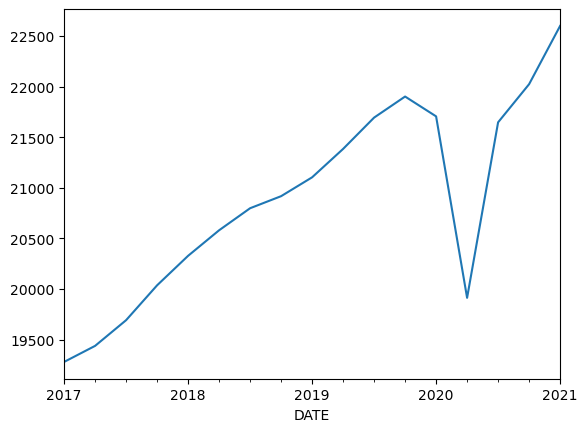

In [25]:
macro_df["GDP"].dropna().plot()



<Axes: xlabel='DATE'>

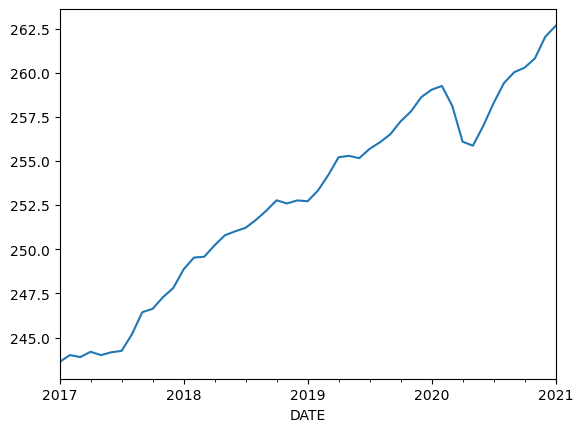

In [26]:
macro_df["CPIAUCSL"].dropna().plot()


<Axes: xlabel='DATE'>

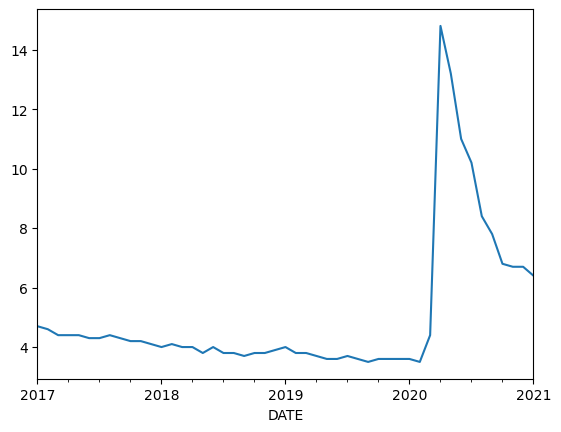

In [27]:
macro_df["UNRATE"].dropna().plot()


In [28]:
macro_df.corr()


,GDP,CPIAUCSL,UNRATE,high,low
GDP,1.000000,0.910459,-0.038597,0.382138,NaN
CPIAUCSL,0.910459,1.000000,0.326438,0.583517,NaN
UNRATE,-0.038597,0.326438,1.000000,0.849096,NaN
high,0.382138,0.583517,0.849096,1.000000,NaN
low,NaN,NaN,NaN,NaN,NaN


Q1: What is the second series above?

In [29]:
# cpi index (not inflation) for urban consumer, see notes above

Q2: What is the frequency of the series?

In [30]:
macro_df.index.inferred_freq # MS: monthly, at the start of months


'MS'

Q3: What is the average ANNUAL GDP, based on the data?

In [31]:
# run these one at a time: 

macro_df["GDP"] # the gdp var

# one simple option: mean of the variable
macro_df['GDP'].mean()  # get one variable from df, then mean() it
macro_df['GDP'].mean()  # this avgs the annualized quarterly seasonlly adjusted data... not QUITE the same

20885.41382352941

In [32]:
# "GDP" from fred is reported  quarterly but "annualized quarterly seasonlly adjusted data"
# , so students will try to convert the data to annual some way
# (either pick Q1, or Q4, or avg them)

# mihn tried to get GDP each year as the avg of the qrtly reports 
# this groupby() is something we cover later today
annuals = macro_df['GDP']   .groupby(macro_df.index.year)    .mean()

# so he got this data, which we could avg:
print(annuals, '\n\n', annuals.mean())

DATE
2017    19612.1025
2018    20656.5155
2019    21521.3950
2020    21322.9495
2021    22600.1850
Name: GDP, dtype: float64 

 21142.629500000003


## Q3 solution
But  annualizing it in any of these ways isn't exact. Go to FRED, look for annual gdp variable: GDPA

In [33]:
# but annualizing it in any of these ways isn't exact
# go to FRED, look for annual gdp variable: GDPA

# here, I'm just downloading and immediately processing the data (not saving it or anything)
pdr.data.DataReader(['GDPA','GDP','CPIAUCSL','UNRATE'], 'fred', start, end).mean()

GDPA        21341.398800
GDP         20885.413824
CPIAUCSL      252.884143
UNRATE          5.032653
dtype: float64

## Part 2

Q4: Download the annual *real* gdp from 1960 to 2018 from FRED and compute the average annual percent change

In [34]:
# pseudocode
# get data (annual real = GDPCA, per fred site)
# compute annual percent change for each year
# store in new column (if needed)
# compute average

# import
import pandas as pd
import pandas_datareader as pdr
import datetime
 
# FRED data from pandas
start = datetime.datetime(1960,1,1)
end = datetime.datetime(2018,12,30)
fred_data = pdr.DataReader('GDPCA', 'fred', start, end)
fred_data

,GDPCA
DATE,
1960-01-01,3500.272
1961-01-01,3590.066
1962-01-01,3810.124
1963-01-01,3976.142
1964-01-01,4205.277
...,...
2014-01-01,18261.714
2015-01-01,18799.622
2016-01-01,19141.672


In [35]:
# # compute pct_change
fred_data["pct_yoy"] = fred_data["GDPCA"].pct_change() 
fred_data

# # Average values
average = fred_data["pct_yoy"].mean()
pct_avg = average *100
print(f'The average real GDP annual percent change from 1960 to 2018 is: {pct_avg.round(4)} %')

The average real GDP annual percent change from 1960 to 2018 is: 3.0878 %


## Q5: Compute the average gdp percent change within *each decade*

### Lesson points

1. Start by psuedocoding: figuring out the steps you need to take **IN PLAIN LANGUAGE** (no coding functions and verbiage)
    - Working backwards helps. What resulting table/fig do I want? > What does the data need to have (new vars, etc) and be shaped like (change in observation levels, wide vs long) before that
    - Here: (1) need a gdp growth rate,  (2) need to know the decade of each row, (3) for each decade, compute the avg growth rate
1. Write each step in a code cell as comments
1. Now, it's fill in the blank... attack each step sequentially
1. "for each" + "df" = "df.groupby()"
    - Syntax: `<dfobject>.groupby(<list of variables to groupby>)`
    - Example: `gdp.groupby(['decade'])`, `stockrets.groupby(['ticker','month])`

So we put in the placeholders:

## Answer for question 5 - (Ziggy's Version)

In [36]:
# this code will give wrong answers if the data doesn't start at the beginning of a decade

# put each decade of the data into a list
decades = []
length = 10

# for loop to slice decade and add to 'decades'
for i in range(0, len(fred_data), length):
    # print(i)
    decade = fred_data.iloc[i:i+length]
    decades.append(decade)

# start in 1960, add 10 years for the decade, print
year = 1960
for dec_df in decades:
    decade_avg = (dec_df['pct_yoy'].mean()) *100
    print(f'The average GDP perecntage change within the {year}s was: {decade_avg.round(4)} %')
    year += length
    

The average GDP perecntage change within the 1960s was: 4.7432 %
The average GDP perecntage change within the 1970s was: 3.2346 %
The average GDP perecntage change within the 1980s was: 3.1234 %
The average GDP perecntage change within the 1990s was: 3.2257 %
The average GDP perecntage change within the 2000s was: 1.9186 %
The average GDP perecntage change within the 2010s was: 2.3755 %


## Answer for question 5 - (Prof's Version)

In [37]:
# pseudocode
# download data
# add variable: growth rate
# add variable: decade
# for each decade,        grab the growth var,  and avg it!

# download data
gdp = pdr.data.DataReader(['GDPCA'], 'fred', 1960, 2018)

# add variable: growth rate
gdp['realgdp_growth'] = gdp['GDPCA'].pct_change()

# add variable: decade
# we figured this out in steps:
#   1. how to get the "date" part of the df to print (gdp.index)
#   2. how to get the "year" out of the index (here: index is a "datetime" object which has a convenient .year attribute)
#   3. how to get 1961  ==> 1960. 
#        convert to string and turn the last digit to zero: int( str(1961)[:-1]+"0" )
#        the math version: 1961/10 = 196.1, but 1961//10 = 196 :)

gdp['year']   = gdp.index.year
gdp['decade'] = (gdp.index.year//10)*10

###########################################
# IMPORTANT!
# for loops on pandas dfs --> groupby()!
###########################################

# for each decade,        grab the growth var,  and avg it!
gdp.groupby(['decade'])   ['realgdp_growth']    .mean()

# (i spaced those out so you can match the words to the code)



#  df         |   FOR EACH DEC        |   get this var    |  avg
gdp  .groupby(['decade'] )    ['realgdp_growth']         .mean()

decade
1960    0.047432
1970    0.032346
1980    0.031234
1990    0.032257
2000    0.019186
2010    0.023755
Name: realgdp_growth, dtype: float64

In [38]:
# alternative to groupby: pivot talbe
gdp.pivot_table(index='decade', values=['realgdp_growth'])

,realgdp_growth
decade,
1960,0.047432
1970,0.032346
1980,0.031234
1990,0.032257
2000,0.019186
2010,0.023755


## Chains, parentheses

[See 3.2.6](https://ledatascifi.github.io/ledatascifi-2024/content/03/02f_chains.html?highlight=lambda)

We can do that last block of code like this:

In [39]:
gdp.assign(year = gdp.index.year,decade = (gdp['year']//10) * 10) .groupby(['decade'] )    ['realgdp_growth']         .mean()

decade
1960    0.047432
1970    0.032346
1980    0.031234
1990    0.032257
2000    0.019186
2010    0.023755
Name: realgdp_growth, dtype: float64

But that's impossible to read! The code stretches to the right. Enter parentheses:

In [40]:
# chaining methods 

# earlier, we did this: df.groupby().mean()
# that's "chaining" two functions together. Run the groupby(),
# then run the mean() on whatever is produced by it without
# saving the intermediate output and referring to it. 

# thats nice but leads to looooooooooong bits of code...
# so we break it up over multiple lines
# and we can add comments within it (nice)

In [41]:
( # parenthese mean everything inside is one line of code
    # --> break up long lines of code
    # --> do a series of steps all at once  (chaining)
    # you can have comments inside this

    # load the data
    gdp 

    # create variables
    .assign(year = gdp.index.year,
           decade = (gdp['year']//10) * 10)

    # get the decade stats
    .groupby(['decade'] )['realgdp_growth'].mean()
)

decade
1960    0.047432
1970    0.032346
1980    0.031234
1990    0.032257
2000    0.019186
2010    0.023755
Name: realgdp_growth, dtype: float64

## Lambdas (optional, but I use them)

I can even add the downloading step to the chain! The only thing is that this creates a little bit of an issue (the dataframe doesn't have a name right after we download it, so how can we write `df['GDPCA']`? 

The fix is lambdas. [See 3.2.7.2](https://ledatascifi.github.io/ledatascifi-2024/content/03/02g_commontasks.html?highlight=lambda#lambda-in-assign-or-after-groupby) to get more background on the `lambda` stuff going on.


In [42]:
( # parenthese mean everything inside is one line of code
    # --> break up long lines of code
    # --> do a series of steps all at once  (chaining)

    # download the data
    pdr.DataReader('GDPCA', 'fred', 1960, 2018)

    # compute gdp growth rate and decade 
    
    # but this df we download doesn't have a name yet!
    # how to refer to it? 
    # lambda x: <pretend the obj is called x>

    .assign(pct_yoy = lambda x: x['GDPCA'].pct_change(), 
            year    = lambda x: x.index.year,
            decade = lambda x: (x['year']//10)*10 )

    # NEVER EVER EVER BASICALLY EVER WRITE A FOR LOOP WITH A DATAFRAME
    
    # for-loop + dataaframe = groupby()
    
    .groupby(['decade']) # for each deacde
    ['pct_yoy']          # grab this variable
    .mean()              # and avg
)

decade
1960    0.047432
1970    0.032346
1980    0.031234
1990    0.032257
2000    0.019186
2010    0.023755
Name: pct_yoy, dtype: float64

## Part 3

First, I'll load January data on unemployment, the Case-Shiller housing index, and median household income in three states (CA/MI/PA). 

**ignore this code, just look at the data at the end!**

In [43]:
# LOAD DATA AND CONVERT TO ANNUAL

start = 1990 # pandas datareader can infer these are years
end = 2018
macro_data = pdr.data.DataReader(['CAUR','MIUR','PAUR', # unemployment 
                                  'LXXRSA','DEXRSA','WDXRSA', # case shiller index in LA, Detroit, DC (no PA  available!)
                                  'MEHOINUSCAA672N','MEHOINUSMIA672N','MEHOINUSPAA672N'], #  
                                 'fred', start, end)
macro_data = macro_data.resample('Y').first() # get's the first observation for each variable in a given year

# CLEAN UP THE FORMATING SOMEWHAT

macro_data.index = macro_data.index.year
# print("\n\n DATA BEFORE FORMATTING: \n\n")
# print(macro_data[:20]) # see how the data looks now? ugly variable names, but its an annual dataset at least
macro_data.columns=pd.MultiIndex.from_tuples([
    ('Unemployment','CA'),('Unemployment','MI'),('Unemployment','PA'),
    ('HouseIdx','CA'),('HouseIdx','MI'),('HouseIdx','PA'),
    ('MedIncome','CA'),('MedIncome','MI'),('MedIncome','PA')
    ])
# print("\n\n DATA AFTER FORMATTING: \n\n")
macro_data[:20] # this is a dataset that is "wide", and now 
                # the column variable names have 2 levels - var name, 
                # and unit/state that variable applies to


Unemployment               HouseIdx                         MedIncome  \
               CA    MI   PA          CA          MI          PA        CA   
DATE                                                                         
1990          5.2   7.7  5.2  100.471193         NaN   93.362855   68370.0   
1991          7.1   8.8  6.5   95.569015   58.420806   89.706871   66720.0   
1992          8.6   9.5  7.4   92.786926   59.748947   88.573807   67460.0   
1993          9.8   7.6  7.2   85.246295   61.564205   89.065118   64260.0   
1994          9.3   7.2  6.7   77.395052   64.526663   88.988467   65210.0   
...           ...   ...  ...         ...         ...         ...       ...   
2005          5.8   7.2  5.2  221.471358  123.264834  210.799937   74610.0   
2006          5.0   6.8  4.8  268.208765  126.872706  250.272528   77490.0   
2007          4.9   7.0  4.4  270.804802  118.163914  241.411122   76120.0   
2008          5.9   7.2  4.8  226.111808  100.378525  215.656562   75120.0   
2009          9.9  10.9  7.0  167.831143   77.690652  174.183886   74260.0   

                        
           MI       PA  
DATE                    
1990  61490.0  59570.0  
1991  63650.0  60180.0  
1992  62370.0  57760.0  
1993  61600.0  58460.0  
1994  65120.0  59190.0  
...       ...      ...  
2005  66210.0  66740.0  
2006  68150.0  67910.0  
2007  67430.0  66160.0  
2008  65600.0  67720.0  
2009  60840.0  63720.0  

[20 rows x 9 columns]

## Q6: for each decade and state, report the average annual CHANGE (level, not percent) in unemployment

In [44]:
# pseudo
# get the change in une
# get the decade of each row
# groupby or pivot table


Solution v1:

In [45]:
# get the change in une

diff_df = macro_data['Unemployment'].diff() # grab the vars with une 

# get the decade of each row
diff_df['dec'] = 10*(macro_data.index // 10)

# 
diff_df.groupby('dec').mean()

,CA,MI,PA
dec,,,
1990,0.044444,-0.411111,-0.077778
2000,0.430000,0.690000,0.250000
2010,-0.611111,-0.711111,-0.244444


Solution v2: (chains)

In [46]:
(# everything till the closing ) is ONE line of code 

    macro_data['Unemployment']   # grab the unemp vars
    
    .diff() # get the changes

    .assign(dec = 10*(macro_data.index // 10)) # get the decade 

    .groupby('dec').mean() # FOR EACH DECADE, avg all variables 

)

,CA,MI,PA
dec,,,
1990,0.044444,-0.411111,-0.077778
2000,0.430000,0.690000,0.250000
2010,-0.611111,-0.711111,-0.244444


Q7: for each decade and state, report the average annual PERCENT CHANGE in house prices and household income

In [47]:
# q6 
# get decade variable
# get annual change in unemploy for each state
# average unemploy for each state within decade

# q7
# get decade variable
# get annual pct change in house price and income for each state
# average those for each state within decade

# HEY! those are similar - let's combine q6 and q7:

# get decade variable
# get annual change in unemploy for each state
# get annual pct change in house price and income for each state
# average unemploy for each state within decade

### Method 1: Brute force, keep dataset "shaped" as is

In [48]:
# get decade variable

macro_data['dec'] = (macro_data.index//10)*10

# get annual change in unemploy for each state

macro_data['ca_une_diff'] = macro_data[ ('Unemployment','CA') ].diff()
macro_data['mi_une_diff'] = macro_data[ ('Unemployment','MI') ].diff()
macro_data['pa_une_diff'] = macro_data[ ('Unemployment','PA') ].diff()

# get annual pct change in house price and income for each state

macro_data['pa_house_pct'] = macro_data[ ('HouseIdx','PA') ].pct_change()*100
macro_data['ca_house_pct'] = macro_data[ ('HouseIdx','CA') ].pct_change()*100
macro_data['mi_house_pct'] = macro_data[ ('HouseIdx','MI') ].pct_change()*100

macro_data['pa_inc_pct'] = macro_data[ ('MedIncome','PA') ].pct_change()*100
macro_data['ca_inc_pct'] = macro_data[ ('MedIncome','CA') ].pct_change()*100
macro_data['mi_inc_pct'] = macro_data[ ('MedIncome','MI') ].pct_change()*100

# a setting to reduce decimals in pandas tables

pd.set_option('display.float_format', '{:,.2f}'.format)

# average our vars for each state within decade
(
    macro_data.groupby('dec') .mean()
    # this is optional adjustment to the output
    .T .tail(9) 
)    

C:\Users\DonsLaptop\AppData\Local\Temp\ipykernel_23388\3402812907.py:27: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  macro_data.groupby('dec') .mean()


,dec,1990,2000,2010
ca_une_diff,,0.04,0.43,-0.61
mi_une_diff,,-0.41,0.69,-0.71
pa_une_diff,,-0.08,0.25,-0.24
pa_house_pct,,0.12,7.22,2.83
ca_house_pct,,-0.71,7.52,5.86
mi_house_pct,,5.92,-1.20,5.16
pa_inc_pct,,0.64,0.22,1.82
ca_inc_pct,,0.69,0.26,1.12
mi_inc_pct,,2.55,-2.17,1.70


In [49]:
# lets look at the data a bit... ABCD!
macro_data.iloc[:10]

Unemployment           HouseIdx             MedIncome            \
               CA   MI   PA       CA    MI    PA        CA        MI   
DATE                                                                   
1990         5.20 7.70 5.20   100.47   NaN 93.36 68,370.00 61,490.00   
1991         7.10 8.80 6.50    95.57 58.42 89.71 66,720.00 63,650.00   
1992         8.60 9.50 7.40    92.79 59.75 88.57 67,460.00 62,370.00   
1993         9.80 7.60 7.20    85.25 61.56 89.07 64,260.00 61,600.00   
1994         9.30 7.20 6.70    77.40 64.53 88.99 65,210.00 65,120.00   
1995         7.80 5.20 5.70    76.38 68.97 89.67 66,730.00 65,680.00   
1996         7.80 4.90 5.90    73.92 73.58 88.66 68,180.00 68,910.00   
1997         6.90 4.70 5.30    74.54 79.35 88.78 68,270.00 66,630.00   
1998         6.00 4.00 4.80    81.04 85.18 90.11 69,450.00 70,960.00   
1999         5.60 4.00 4.50    92.14 92.43 94.19 72,520.00 76,610.00   

                 dec ca_une_diff mi_une_diff pa_une_diff pa_house_pct  \
            PA                                                          
DATE                                                                    
1990 59,570.00  1990         NaN         NaN         NaN          NaN   
1991 60,180.00  1990        1.90        1.10        1.30        -3.92   
1992 57,760.00  1990        1.50        0.70        0.90        -1.26   
1993 58,460.00  1990        1.20       -1.90       -0.20         0.55   
1994 59,190.00  1990       -0.50       -0.40       -0.50        -0.09   
1995 62,250.00  1990       -1.50       -2.00       -1.00         0.77   
1996 61,310.00  1990        0.00       -0.30        0.20        -1.13   
1997 64,520.00  1990       -0.90       -0.20       -0.60         0.14   
1998 66,200.00  1990       -0.90       -0.70       -0.50         1.50   
1999 62,760.00  1990       -0.40        0.00       -0.30         4.53   

     ca_house_pct mi_house_pct pa_inc_pct ca_inc_pct mi_inc_pct  
                                                                 
DATE                                                             
1990          NaN          NaN        NaN        NaN        NaN  
1991        -4.88          NaN       1.02      -2.41       3.51  
1992        -2.91         2.27      -4.02       1.11      -2.01  
1993        -8.13         3.04       1.21      -4.74      -1.23  
1994        -9.21         4.81       1.25       1.48       5.71  
1995        -1.32         6.89       5.17       2.33       0.86  
1996        -3.22         6.68      -1.51       2.17       4.92  
1997         0.83         7.84       5.24       0.13      -3.31  
1998         8.72         7.35       2.60       1.73       6.50  
1999        13.70         8.51      -5.20       4.42       7.96

### A small challenge

This part of the code below can be collapsed to a single line of code.
```python
macro_data['ca_une_diff'] = macro_data[ ('Unemployment','CA') ].diff()
macro_data['mi_une_diff'] = macro_data[ ('Unemployment','MI') ].diff()
macro_data['pa_une_diff'] = macro_data[ ('Unemployment','PA') ].diff()
```
Please let me know if you pull it off!

### Method 2: "Tidy" the data and reshape it

The basic idea is that instead of doing the variable creation 3 times for each variable, that if the unemployment variables were stacked on top of each other, we'd only have to do the variable creation once per variable. To do that, we need to convert the data from "wide" to tall.  

For more, see discussion in the textbook Pandas chapters about data shapes. (Tall vs wide)

**First, let's reload the data from scratch:**

In [50]:
# LOAD DATA AND CONVERT TO ANNUAL

start = 1990 # pandas datareader can infer these are years
end = 2018
macro_data = pdr.data.DataReader(['CAUR','MIUR','PAUR', # unemployment 
                                  'LXXRSA','DEXRSA','WDXRSA', # case shiller index in LA, Detroit, DC (no PA  available!)
                                  'MEHOINUSCAA672N','MEHOINUSMIA672N','MEHOINUSPAA672N'], #  
                                 'fred', start, end)
macro_data = macro_data.resample('Y').first() # get's the first observation for each variable in a given year

# CLEAN UP THE FORMATING SOMEWHAT

macro_data.index = macro_data.index.year
macro_data.columns=pd.MultiIndex.from_tuples([
    ('Unemployment','CA'),('Unemployment','MI'),('Unemployment','PA'),
    ('HouseIdx','CA'),('HouseIdx','MI'),('HouseIdx','PA'),
    ('MedIncome','CA'),('MedIncome','MI'),('MedIncome','PA')
    ])


Now we can try the "Method 2" approach.

To understand how this works, comment out everything inside the parentheses. Then uncomment the first line of code, and run it. See what its output looks like. Then, uncomment the next line of code and so on. (You'll uncomment all the lines of the `.assign()` at the same time.)

In [51]:
(
    # reformat the data to tall with "stack"
    macro_data.stack()
    
    # to make later steps (like the groupby) a touch easier, 
    # convert year and state from the index into variables
    .reset_index().rename(columns={'level_1':'state'})
    
    # now order the dataset sensibly
    .sort_values(['state','DATE'])    
    
    # create vars <---- this is not even needed to explain this block!
    .assign(
            decade          = lambda x: 10*np.floor(x['DATE']/10).astype(int),
            unemploy_diff   = lambda x: x['Unemployment'].diff(),
            HouseIdx_pctch  = lambda x: x['HouseIdx'].pct_change()*100,
            MedIncome_pctch = lambda x: x['MedIncome'].pct_change()*100    
    )
    
    # opt A for output: pivot_table
#     .pivot_table(index='decade',
#                  columns='state',
#                  values=['unemploy_diff','HouseIdx_pctch','MedIncome_pctch'])
#     .multiply(100) # for more meaningful displays 
    
    # opt B for output: groupby 
    # also, optional advanced formatting 
    .groupby(['state','decade'])
    [['unemploy_diff','HouseIdx_pctch','MedIncome_pctch']].mean()
    .style.format({'HouseIdx_pctch': '{0:,.2f}%',
                   'MedIncome_pctch': '{0:,.2f}%',
                   'unemploy_diff': '{0:,.2f} p.p.'})
)    

C:\Users\DonsLaptop\AppData\Local\Temp\ipykernel_23388\3754621755.py:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  HouseIdx_pctch  = lambda x: x['HouseIdx'].pct_change()*100,


## Hmmmmmmmmm

**There is a slight problem: Compare the output of Method 1 and Method 2... they give slightly different answers.**

What causes the difference? Well the data must somehow be different right before doing the output!

So let's look at the data right after you're done reworking it (and right before the output). That's always a good idea, and a hyper smart version of ABCD.

Clue: Method 2 gives different numbers for the 1990s only, and for only MI and PI, but 1990-CA is the same as Method 1.

So, let's look at the part of the dataframe for Michigan in the 1990s, plus the rows right above where Michigan starts.


In [52]:
(
# this is the same as above...
    
    # reformat the data to tall with "stack"
    macro_data.stack()
    
    # to make later steps (like the groupby) a touch easier, 
    # convert year and state from the index into variables
    .reset_index().rename(columns={'level_1':'state'})
    
    # now order the dataset sensibly to ensure our subsequent var definitions are right!
    .sort_values(['state','DATE'])    
    
    # create vars <---- this is not even needed to explain this block!
    .assign(
            decade          = lambda x: 10*np.floor(x['DATE']/10).astype(int),
            unemploy_diff   = lambda x: x['Unemployment'].diff(),
            HouseIdx_pctch  = lambda x: x['HouseIdx'].pct_change(),
            MedIncome_pctch = lambda x: x['MedIncome'].pct_change()    
    )
   
    # ok this is new:    
    # look at the part where CA ends and MI begins,
    # and focus on the houseidx variables
    .iloc[25:34,[0,1,2,-2] ]
    
    # How is the house index percent change defined for MI in 1990? There is no 1989!
    # because .pct_change() compares one row to the prior, and doesn't know to ignore 
    # when the state changes!
    
    # solution: when we define these variables, we need to do them "separately" 
    # "FOR EACH" state. We need to insert a "groupby(state)" into each variable definition
    
    # so: unemploy_diff   = lambda x: x.groupby('STATE')['Unemployment'].diff(),   
    
)  

C:\Users\DonsLaptop\AppData\Local\Temp\ipykernel_23388\3966163646.py:18: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  HouseIdx_pctch  = lambda x: x['HouseIdx'].pct_change(),


,DATE,state,Unemployment,HouseIdx_pctch
75,2015,CA,6.80,0.05
78,2016,CA,5.70,0.07
81,2017,CA,5.20,0.05
84,2018,CA,4.40,0.07
1,1990,MI,7.70,0.00
4,1991,MI,8.80,-0.79
7,1992,MI,9.50,0.02
10,1993,MI,7.60,0.03
13,1994,MI,7.20,0.05
